In [ ]:
pip install pmaw

In [ ]:
from pmaw import PushshiftAPI
import datetime as dt
import pandas as pd

In [ ]:
#uncomment if you need to re-read the data#
# api = PushshiftAPI()
#uncomment if you need to re-read the data## 

# #Internship #Jobs
#jobs #work #careeropportunity #gautengjobs #hiring #internship #lookingforwork #jobseeker
#jobopportunity
#careerdevelopment 

In [ ]:
#uncomment if you need to re-read the data## 
# data_type="comment"     # give me comments, use "submission" to publish something
# query="internships"          # Add your query
#uncomment if you need to re-read the data## 
# duration="30d"          # Select the timeframe. Epoch value or Integer + "s,m,h,d" (i.e. "second", "minute", "hour", "day")
#uncomment if you need to re-read the data## 
# size=100000               # maximum 1000 comments
# sort_type="score"       # Sort by score (Accepted: "score", "num_comments", "created_utc")
# sort="desc"             # sort descending
#uncomment if you need to re-read the data## 
# aggs="subreddit"        #"author", "link_id", "created_utc", "subreddit"
#uncomment if you need to re-read the data## 
# subreddit="internships"
# before = int(dt.datetime(2019,12,31,0,0).timestamp())
# after = int(dt.datetime(2018,1,1,0,0).timestamp())
#uncomment if you need to re-read the data## 

In [ ]:
#uncomment if you need to re-read the data## 
# subreddit="internships"
# limit=100000
# comments = api.search_comments(
# #                         q = query,
#                           after=after,
#                           size=size,
#                           sort_type=sort_type,
#                           sort=sort,
#                           before=before,
#                           subreddit=subreddit)
# print(f'Retrieved {len(comments)} comments from Pushshift')
#uncomment if you need to re-read the data## 

In [ ]:
#uncomment if you need to re-read the data## 
# comment_list = [comment for comment in comments]
# comment_list
#uncomment if you need to re-read the data## 

In [ ]:
#uncomment if you need to re-read the data## 
# import pandas as pd
# df = pd.DataFrame.from_records(comment_list)
# df
# df.to_csv("PreCovidCommentsData.csv")
#uncomment if you need to re-read the data## 

In [ ]:
#uncomment if you need to re-read the data## 
# import time
# from datetime import datetime
# # time.time()
# datetime.fromtimestamp(1597903987)
#uncomment if you need to re-read the data## 
# dt.timestamp(1434549820776/1000)
# datetime.fromtimestamp(1434549820776/1000)
# # Select the columns you care about
# df = pd.DataFrame.from_records(comment_list)[["author", "subreddit", "score", "body", "permalink"]]
 
# # Keep the first 400 characters
# df['body'] = df['body'].str[0:400] + "..."
 
# # Append the string to all the permalink entries so that we have a link to the comment
# df['permalink'] = "https://reddit.com" + df['permalink'].astype(str)
 
 
# # Create a function to make the link to be clickable and style the last column
# def make_clickable(val):
#     """ Makes a pandas column clickable by wrapping it in some html.
#     """
#     return '<a href="{}">Link</a>'.format(val,val)

In [ ]:
#uncomment if you need to re-read the data## 
# def make_clickable(val):
#     return '<a href="{}">{}</a>'.format(val,val)
#uncomment if you need to re-read the data## 

In [ ]:
#uncomment if you need to re-read the data## 
# df.style.format({'permalink': make_clickable})
#uncomment if you need to re-read the data## 

In [ ]:
# def writeToCSV(filename, word_freq):
#     with open(filename, 'w') as f:
#         c = 0
#     for key in word_freq.keys():
#         if c > 50:
#             exit;
#         else:
#             c = c+1
#             f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
pip install wordcloud

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

In [59]:
def stemming(words):
    snow_stemmer = SnowballStemmer(language='english')
    stem_words = []
    for w in words:
        x = snow_stemmer.stem(w)
        stem_words.append(x)
    return stem_words

In [60]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [61]:
full_forms = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [62]:
all_stopwords = stopwords.words('english')
stops = set(stopwords.words('english'))
stops.update(["gonna", "ur", "youll","wont","nope","good","luck","may","might","wasnt","je","ill","nd","en","dc", "yea", "th","not", "no", "i", "am", "theyve", "ive", "m", "xb", "she", "he","x", "fo", "gt","lol","id","imo","ux", "ap","mo","oh","rn","till","hi","b","could","ive","yeah","pm", "op","still","sorry","hey","hello","else","if","something","dont","doesnt","next","le", "let", "see","u","will","i","youre","etc", "someone", "im", "would", "like", "know", "one", "also", "want", "make", "even", "lot", "think", "much", "go", "year","sure","take","look","really"])

In [63]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stops])

In [64]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [65]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [66]:
def remove_single_letters(text):
    return ' '.join( [w for w in text.split() if len(w)>1] )

In [67]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def preprocess(txt):

    #2 fill contractions
    temp=[]
    txt=txt.split()
    for wd in txt:
        if wd in full_forms:
            temp.append(full_forms[wd])
        else:
            temp.append(wd)
    txt = " ".join(temp)
       
    #3 convert all text to lower case
    txt=txt.lower()

    #4 remove stop words excluding word NO, NOT
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('no')
    all_stopwords.remove('not')
    txt = txt.split()
    stops = set(all_stopwords)
    txt = [w for w in txt if not w in stops]
    txt = " ".join(txt)

    #5 remove noise from text
    txt = re.sub(r'https?:\/\/.*[\r\n]*', '', txt, flags=re.MULTILINE)
    txt = re.sub(r'\<a href', ' ', txt)
    txt = re.sub(r'&amp;', '', txt) 
    txt = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', txt)
    txt = re.sub(r'<br />', ' ', txt)
    txt = re.sub(r'\'', ' ', txt)
    txt = re.sub(' +', ' ', txt)
    txt = re.sub("\d+", "", txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    txt = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', txt)
    txt = re.sub(r'(?:^| )\w(?:$| )', ' ', txt).strip()
    
    #6 tokenize 
    txt =  nltk.WordPunctTokenizer().tokenize(txt)

    #7 lemmatize
    lemmatizer = WordNetLemmatizer()
    txt = [lemmatizer.lemmatize(w) for w in txt]
  
    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhilamantri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akhilamantri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/akhilamantri/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [68]:
#Preprocess
def preprocess1(df):
    new=[]
    for i in range(len(df['body'])):
        new.append(preprocess(df['body'][i]))
    df['body']=new
    df['body']= df['body'].str.join(" ")
    df['body'] = df['body'].apply(lambda x: remove_stopwords(x))
    #df['body'] = df['body'].apply(lambda x: stem_words(x))
    df['body'] = df['body'].apply(lambda text: lemmatize_words(text))
    df['body'] = df['body'].apply(lambda text: remove_single_letters(text))

    print(df.body)
    lemmatizer = WordNetLemmatizer()
    text2 = ' '.join(lemmatizer.lemmatize(title) for title in df.body)
    return text2

In [ ]:
#Post preprocessed text to the text file 2021
df = pd.read_csv("Data/Internships_2021.csv")
text2 = preprocess1(df)
text2
with open('textdata_2021.txt', 'w') as f:
    f.write(text2)

In [ ]:
#Post preprocessed text to the text file 2021
df = pd.read_csv("Data/Internships_2020.csv")
text2 = preprocess1(df)
text2
with open('textdata_2020.txt', 'w') as f:
    f.write(text2)

In [ ]:
#Post preprocessed text to the text file 2021
df = pd.read_csv("Data/Internships_2019.csv")
text2 = preprocess1(df)
text2
with open('textdata_2019.txt', 'w') as f:
    f.write(text2)

In [ ]:
#Post preprocessed text to the text file 2021
df = pd.read_csv("Data/Internships_2018.csv")
text2 = preprocess1(df)
text2
with open('textdata_2018.txt', 'w') as f:
    f.write(text2)

In [ ]:
data = data2 = "" 
with open('July7th/textdata_2018.txt') as fp: 
    data = fp.read() 
with open('July7th/textdata_2019.txt') as fp: 
    data2 = fp.read() 
# Merging two files into one another file 
data += "\n"
data += data2 
with open ('July7th/2018_2019_precovidtextdata.txt', 'w') as fp: 
    fp.write(data)

In [ ]:
with open('July7th/2018_2019_precovidtextdata.txt') as f:
    text2 = f.read()
text_dictionary = WordCloud(stopwords = stops, collocations = True, background_color = 'white', max_words=100).process_text(text2)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq

In [ ]:
with open('July7th/2018_2019_precovidwordfrequall.csv', 'w') as f:
    c = 0
    for key in word_freq.keys():
#         if c > 100:
#             exit;
#         else:
#             c = c+1
            f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
word_cloud1 = WordCloud(stopwords = stops,collocations = True, max_words = 1000, background_color = 'Grey', colormap = 'prism', min_font_size = 8, max_font_size = 300, collocation_threshold = 2).generate(text2)
plt.figure(figsize=(14,16))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()

In [ ]:
data = data2 = "" 
with open('July7th/textdata_2020.txt') as fp: 
    data = fp.read() 
with open('July7th/textdata_2021.txt') as fp: 
    data2 = fp.read() 
# Merging two files into one another file 
data += "\n"
data += data2 
with open ('July7th/2020_2021_postcovidtextdata.txt', 'w') as fp: 
    fp.write(data)

In [ ]:
with open('July7th/2020_2021_postcovidtextdata.txt') as f:
    text2 = f.read()
text_dictionary = WordCloud(stopwords = stops, collocations = True, background_color = 'white', max_words=100).process_text(text2)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq
# writeToCSV('WordFreque_2018.csv', word_freq)

In [ ]:
with open('July7th/2020_2021_postcovidwordfrequall.csv', 'w') as f:
    c = 0
    for key in word_freq.keys():
#         if c > 100:
#             exit;
#         else:
#             c = c+1
        f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
word_cloud1 = WordCloud(stopwords = stops,collocations = True, max_words = 1000, background_color = 'Grey', colormap = 'prism', min_font_size = 8, max_font_size = 300, collocation_threshold = 2).generate(text2)
plt.figure(figsize=(14,16))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()

In [ ]:
df = pd.read_csv("Data/Internships_2018.csv")
df.head()
text2 = preprocess1(df)
# text_dictionary = WordCloud().process_text(text2)
text_dictionary = WordCloud(stopwords = stops, collocations = False, background_color = 'white', max_words=100).process_text(text2)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq
# writeToCSV('WordFreque_2018.csv', word_freq)

In [ ]:
with open('FrequencyDataTop100/WordFreque_2018.csv', 'w') as f:
    c = 0
    for key in word_freq.keys():
        if c > 100:
            exit;
        else:
            c = c+1
            f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
from wordcloud import ImageColorGenerator

In [ ]:
df = pd.read_csv("Data/Internships_2018.csv")
df.head()
text2 = preprocess1(df)
comments2018 = len(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, max_words = 100, background_color = 'grey', min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
comments2018

In [ ]:
df = pd.read_csv("Data/Internships_2019.csv")
df.head()
text2 = preprocess1(df)
text_dictionary = WordCloud(stopwords = stops, collocations = False, background_color = 'grey', max_words=100).process_text(text2)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq

In [ ]:
with open('FrequencyDataTop100/WordFreque_2019.csv', 'w') as f:
    c = 0
    for key in word_freq.keys():
        if c > 100:
            exit;
        else:
            c = c+1
            f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
df = pd.read_csv("Data/Internships_2019.csv")
df.head()
text2 = preprocess1(df)
comments2019 = len(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
comments2019

In [ ]:
df = pd.read_csv("Data/Internships_2020.csv")
df.head()
text2 = preprocess1(df)
comments2020 = len(df)
text_dictionary = WordCloud(stopwords = stops, collocations = False, background_color = 'grey', max_words=100).process_text(text2)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq

In [ ]:
with open('FrequencyDataTop100/WordFreque_2020.csv', 'w') as f:
    c = 0
    for key in word_freq.keys():
        if c > 100:
            exit;
        else:
            c = c+1
            f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
df = pd.read_csv("Data/Internships_2020.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
comments2020

In [ ]:
df = pd.read_csv("Data/Internships_2021.csv")
df.head()
text2 = preprocess1(df)
comments2021 = len(df)
text_dictionary = WordCloud(stopwords = stops, collocations = True, background_color = 'white', max_words=100).process_text(text2)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
word_freq

In [ ]:
with open('FrequencyDataTop100/WordFreque_2021.csv', 'w') as f:
    c = 0
    for key in word_freq.keys():
        if c > 100:
            exit;
        else:
            c = c+1
            f.write("%s, %s\n" % (key, word_freq[key]))

In [ ]:
df = pd.read_csv("Data/Internships_2021.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
comments2021

In [ ]:
list1 = ['2018', '2019', '2020', '2021']
list2 = [comments2018, comments2019, comments2020, comments2021]
plt.plot(list1, list2)

In [ ]:
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['body']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [ ]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
import numpy as np
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [ ]:
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)
print(dfs)

In [2]:
import pandas as pd

In [ ]:
data = data2 = "" 
with open('July7th/textdata_2018.txt') as fp: 
    data = fp.read() 
with open('July7th/textdata_2019.txt') as fp: 
    data2 = fp.read() 
# Merging two files into one another file 
data += "\n"
data += data2 
with open ('July7th/2018_2019_precovidtextdata.txt', 'w') as fp: 
    fp.write(data)

In [71]:
df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body'].str.lower()
remote_2018 = comments[comments.str.contains('remote', case = 'False')]
print(comments[comments.str.contains('remote', case = 'False')])
with open('remote_2018.csv', 'w') as f:
    remote_2018.to_csv('remote_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body'].str.lower()
remote_2019 = comments[comments.str.contains('remote', case = 'False')]
print(comments[comments.str.contains('remote', case = 'False')])
with open('remote_2019.csv', 'w') as f:
    remote_2019.to_csv('remote_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body'].str.lower()
remote_2020 = comments[comments.str.contains('remote', case = 'False')]
print(comments[comments.str.contains('remote', case = 'False')])
with open('remote_2020.csv', 'w') as f:
    remote_2020.to_csv('remote_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body'].str.lower()
remote_2021 = comments[comments.str.contains('remote', case = 'False')]
print(comments[comments.str.contains('remote', case = 'False')])
with open('remote_2021.csv', 'w') as f:
    remote_2021.to_csv('remote_2021.csv')
    
remote18_19 = pd.concat([remote_2018, remote_2019]).drop_duplicates()
remote20_21 = pd.concat([remote_2020, remote_2021]).drop_duplicates()

print('remote18_19')
print(remote18_19)

print('remote20_21')
print(remote20_21)

print('end')

with open('remote_precovid.csv', 'w') as f:
    remote18_19.to_csv('remote_precovid.csv')
with open('remote_postcovid.csv', 'w') as f:
    remote20_21.to_csv('remote_postcovid.csv')

df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body'].str.lower()
online_2018 = comments[comments.str.contains('online', case = 'False')]
print(comments[comments.str.contains('online', case = 'False')])
with open('online_2018.csv', 'w') as f:
    online_2018.to_csv('online_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body'].str.lower()
online_2019 = comments[comments.str.contains('online', case = 'False')]
print(comments[comments.str.contains('online', case = 'False')])
with open('online_2019.csv', 'w') as f:
    online_2019.to_csv('online_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body'].str.lower()
online_2020 = comments[comments.str.contains('online', case = 'False')]
print(comments[comments.str.contains('online', case = 'False')])
with open('online_2020.csv', 'w') as f:
    online_2020.to_csv('online_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body'].str.lower()
online_2021 = comments[comments.str.contains('online', case = 'False')]
print(comments[comments.str.contains('online', case = 'False')])
with open('online_2021.csv', 'w') as f:
    online_2021.to_csv('online_2021.csv')
    
online18_19 = pd.concat([online_2018, online_2019]).drop_duplicates()
online20_21 = pd.concat([online_2020, online_2021]).drop_duplicates()

print('online18_19')
print(online18_19)

print('online20_21')
print(online20_21)

print('end')

with open('online_precovid.csv', 'w') as f:
    online18_19.to_csv('online_precovid.csv')
with open('online_postcovid.csv', 'w') as f:
    online20_21.to_csv('online_postcovid.csv')

df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body'].str.lower()
virtual_2018 = comments[comments.str.contains('virtual', case = 'False')]
print(comments[comments.str.contains('virtual', case = 'False')])
with open('virtual_2018.csv', 'w') as f:
    virtual_2018.to_csv('virtual_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body'].str.lower()
virtual_2019 = comments[comments.str.contains('virtual', case = 'False')]
print(comments[comments.str.contains('virtual', case = 'False')])
with open('virtual_2019.csv', 'w') as f:
    virtual_2019.to_csv('virtual_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body'].str.lower()
virtual_2020 = comments[comments.str.contains('virtual', case = 'False')]
print(comments[comments.str.contains('virtual', case = 'False')])
with open('virtual_2020.csv', 'w') as f:
    virtual_2020.to_csv('virtual_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body'].str.lower()
virtual_2021 = comments[comments.str.contains('virtual', case = 'False')]
print(comments[comments.str.contains('virtual', case = 'False')])
with open('virtual_2021.csv', 'w') as f:
    virtual_2021.to_csv('virtual_2021.csv')
    
virtual18_19 = pd.concat([virtual_2018, virtual_2019]).drop_duplicates()
virtual20_21 = pd.concat([virtual_2020, virtual_2021]).drop_duplicates()

print('virtual18_19')
print(virtual18_19)

print('virtual20_21')
print(virtual20_21)

print('end')

with open('virtual_precovid.csv', 'w') as f:
    virtual18_19.to_csv('virtual_precovid.csv')
with open('virtual_postcovid.csv', 'w') as f:
    virtual20_21.to_csv('virtual_postcovid.csv')

10      this is spam. the page it links to has nothing...
210     hi hailey,\n\nwhat kind of writing do you do? ...
320     also just occurred to me you can use handshake...
551     oil and gas industry\n\ngood:\n\n**good pay.**...
587     it can be remote--we'll just meet on zoom. loc...
1132    no, this is our first job board. i think a lot...
Name: body, dtype: object
116     well, if they can work remotely, meaning they ...
159     remote internships are bs, unless they pay. if...
191     there's a cool opening here - it's remote, but...
209     i live in a pretty remote area :( and the coun...
752     i faced the same issue and just bit the bullet...
922     remote internships are bs, unless they pay. if...
945     remote and unpaid. good luck in your search. y...
972     thanks for doing that! \ni’ve seen too many re...
987     hi hhdern,\n\n&amp;#x200b;\n\nmentorship can b...
1067    i asked to be transferred to a sister company ...
1208    i live in a pretty remote area :( and 

217    already applied at nga. had a virtual intervie...
221    lol, i got the offer for the virtual interview...
Name: body, dtype: object
126     it really depends on what company your intervi...
127     oops! i should’ve clarified, i mean if i get t...
135     i'm not an expert on digital marketing, so i w...
901     i'm not an expert on digital marketing, so i w...
1421    it really depends on what company your intervi...
1422    oops! i should’ve clarified, i mean if i get t...
1442    in all honesty, it was one of the most chill r...
2096    i'm not an expert on digital marketing, so i w...
2468    it really depends on what company your intervi...
2469    oops! i should’ve clarified, i mean if i get t...
Name: body, dtype: object
10      agreed, but this does sound more like an inter...
16      my internship is supposed to be virtual till t...
38      i don't think you'll get much out of it, hones...
39      what field are you going into? depending on yo...
66      https://www.li

In [72]:
#Merging All Remote related Internship Discussions
virtualremote18_19 = pd.concat([virtual18_19, remote18_19]).drop_duplicates()
virtualremoteonline18_19 = pd.concat([virtualremote18_19, online18_19]).drop_duplicates()

virtualremote20_21 = pd.concat([virtual20_21, remote20_21]).drop_duplicates()
virtualremoteonline20_21 = pd.concat([virtualremote20_21, online20_21]).drop_duplicates()


with open('virtualremoteonline_precovid.csv', 'w') as f:
    virtualremoteonline18_19.to_csv('virtualremoteonline_precovid.csv')
with open('virtualremoteonline_postcovid.csv', 'w') as f:
    virtualremoteonline20_21.to_csv('virtualremoteonline_postcovid.csv')

0     already applied nga virtual interview couple w...
1     got offer virtual interview due tomorrow done ...
2     depends company interviewing surprised though ...
3     oops shouldve clarified mean get internship in...
4     expert digital marketing give advice topic don...
                            ...                        
79    finding internship time find right therefore c...
80    unfair exploded information different online c...
81    case everyone playing devil advocate impossibl...
82    bot bleep bloop linked thread another place re...
83    based comment sound difficulty finding rather ...
Name: body, Length: 84, dtype: object


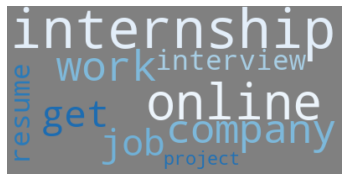

In [75]:
df = pd.read_csv("Remote/virtualremoteonline_precovid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('virtualremoteonline_precovid.txt', 'w') as f:
    f.write(text2)

0      agreed sound internship service rather interns...
1      internship supposed virtual end person june ju...
2      get honestly applied marketing internship upke...
3      field going depending field sort volunteer vir...
4                                                       
                             ...                        
280    gtdoes anyone internship require reference let...
281    considering able find information online peopl...
282    suggest try reach recruiter linkedin followup ...
283    suck bro need course credit udemy coursera foc...
284       bro learn internship course online learn skill
Name: body, Length: 285, dtype: object


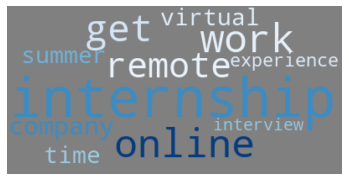

In [76]:
df = pd.read_csv("Remote/virtualremoteonline_postcovid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('virtualremoteonline_postcovid.txt', 'w') as f:
    f.write(text2)

In [78]:
# not contains remote, virtual, online
df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body'].str.lower()
noremote_2018 = comments[~comments.str.contains('remote', case = 'False')]
noremotevirtual_2018 = noremote_2018[~noremote_2018.str.contains('virtual', case = 'False')]
noremoteonlinevirtual_2018 = noremotevirtual_2018[~noremotevirtual_2018.str.contains('online', case = 'False')]
print(noremoteonlinevirtual_2018)
with open('noremoteonlinevirtual_2018.csv', 'w') as f:
    noremoteonlinevirtual_2018.to_csv('noremoteonlinevirtual_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body'].str.lower()
noremote_2019 = comments[~comments.str.contains('remote', case = 'False')]
noremotevirtual_2019 = noremote_2019[~noremote_2019.str.contains('virtual', case = 'False')]
noremoteonlinevirtual_2019 = noremotevirtual_2019[~noremotevirtual_2019.str.contains('online', case = 'False')]
print(noremoteonlinevirtual_2019)
with open('noremoteonlinevirtual_2019.csv', 'w') as f:
    noremoteonlinevirtual_2019.to_csv('noremoteonlinevirtual_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body'].str.lower()
noremote_2020 = comments[~comments.str.contains('remote', case = 'False')]
noremotevirtual_2020 = noremote_2020[~noremote_2020.str.contains('virtual', case = 'False')]
noremoteonlinevirtual_2020 = noremotevirtual_2020[~noremotevirtual_2020.str.contains('online', case = 'False')]
print(noremoteonlinevirtual_2020)
with open('noremoteonlinevirtual_2020.csv', 'w') as f:
    noremoteonlinevirtual_2018.to_csv('noremoteonlinevirtual_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body'].str.lower()
noremote_2021 = comments[~comments.str.contains('remote', case = 'False')]
noremotevirtual_2021 = noremote_2021[~noremote_2021.str.contains('virtual', case = 'False')]
noremoteonlinevirtual_2021 = noremotevirtual_2021[~noremotevirtual_2021.str.contains('online', case = 'False')]
print(noremoteonlinevirtual_2021)
with open('noremoteonlinevirtual_2021.csv', 'w') as f:
    noremoteonlinevirtual_2021.to_csv('noremoteonlinevirtual_2021.csv')

0       wasn't tesla's official facebook page deleted ...
1       economics undergrad here with a few business i...
2       i’ve personally never heard of a situation whe...
3       do you have the contact information of the per...
4       any job description or anything? just pumping ...
                              ...                        
1194    hi there！\n\nwe offer industry internships (wh...
1195    depending on what industry you're in, you can ...
1196                                            [deleted]
1197     thanks for your feedback. i'll have to opt fo...
1198    back in my day we called it "waiting tables". ...
Name: body, Length: 1160, dtype: object
0       i would just say "i'm really interested in wor...
1                               110% the important city. 
2       applied to it as well and never heard back, ju...
3       well, just some loose advice - use one or more...
4           if you're a us citizen, it wont be too hard. 
                              ..

In [81]:
#Merging All no Remote related Internship Discussions
novirtualremoteonline18_19 = pd.concat([noremoteonlinevirtual_2018, noremoteonlinevirtual_2019]).drop_duplicates()

novirtualremoteonline20_21 = pd.concat([noremoteonlinevirtual_2020, noremoteonlinevirtual_2021]).drop_duplicates()


with open('novirtualremoteonline_precovid.csv', 'w') as f:
    novirtualremoteonline18_19.to_csv('novirtualremoteonline_precovid.csv')
with open('novirtualremoteonline_postcovid.csv', 'w') as f:
    novirtualremoteonline20_21.to_csv('novirtualremoteonline_postcovid.csv')

0       internship need pay almost always fraud litera...
1       daily todo list keep contact supervisor team c...
2       unpaid internship typically illegal nowadays read
3       dude startup offering internship guise getting...
4       unpaid internship startup company biggest red ...
                              ...                        
5507      recently received interview describe experience
5508        dependent role industry whats major kind role
5509           anyone hear back yet got email google form
5510    definitely ask internship summer appreciate op...
5511                                         rip idk bruh
Name: body, Length: 5512, dtype: object


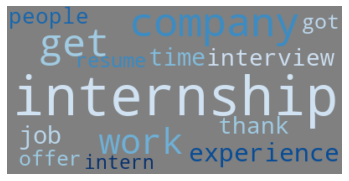

In [82]:
df = pd.read_csv("Offline/novirtualremoteonline_postcovid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('novirtualremoteonline_postcovid.txt', 'w') as f:
    f.write(text2)

0               tesla official facebook page deleted musk
1       economics undergrad business internship belt h...
2       personally never heard situation negotiated pa...
3       contact information person interviewed try cal...
4         job description anything pumping affiliate link
                              ...                        
2585    place different schedule university doe two we...
2586    aside fact internship requirement student stud...
2587    ask letter recommendation job internship file ...
2588    try reframe everything term project instead cl...
2589                                 link website guy pay
Name: body, Length: 2590, dtype: object


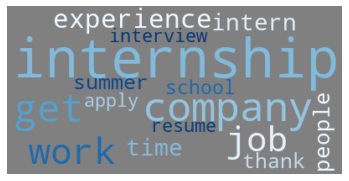

In [83]:
df = pd.read_csv("Offline/novirtualremoteonline_precovid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('novirtualremoteonline_precovid.txt', 'w') as f:
    f.write(text2)

In [ ]:
df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body']
facetoface_2018 = comments[comments.str.contains('facetoface', case = 'False')]
print(comments[comments.str.contains('facetoface', case = 'False')])
with open('facetoface_2018.csv', 'w') as f:
    facetoface_2018.to_csv('facetoface_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body']
facetoface_2019 = comments[comments.str.contains('facetoface', case = 'False')]
print(comments[comments.str.contains('facetoface', case = 'False')])
with open('facetoface_2019.csv', 'w') as f:
    facetoface_2019.to_csv('facetoface_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body']
facetoface_2020 = comments[comments.str.contains('facetoface', case = 'False')]
print(comments[comments.str.contains('facetoface', case = 'False')])
with open('facetoface_2020.csv', 'w') as f:
    facetoface_2020.to_csv('facetoface_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body']
facetoface_2021 = comments[comments.str.contains('facetoface', case = 'False')]
print(comments[comments.str.contains('facetoface', case = 'False')])
with open('facetoface_2021.csv', 'w') as f:
    facetoface_2021.to_csv('facetoface_2021.csv')
    
facetoface18_19 = pd.concat([facetoface_2018, facetoface_2019]).drop_duplicates()
facetoface20_21 = pd.concat([facetoface_2020, facetoface_2021]).drop_duplicates()

print('facetoface18_19')
print(facetoface18_19)

print('facetoface20_21')
print(facetoface20_21)

print('end')

with open('facetoface_precovid.csv', 'w') as f:
    facetoface18_19.to_csv('facetoface_precovid.csv')
with open('facetoface_postcovid.csv', 'w') as f:
    facetoface20_21.to_csv('facetoface_postcovid.csv')
    
df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body']
onsite_2018 = comments[comments.str.contains('onsite', case = 'False')]
print(comments[comments.str.contains('onsite', case = 'False')])
with open('onsite_2018.csv', 'w') as f:
    onsite_2018.to_csv('onsite_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body']
onsite_2019 = comments[comments.str.contains('onsite', case = 'False')]
print(comments[comments.str.contains('onsite', case = 'False')])
with open('onsite_2019.csv', 'w') as f:
    onsite_2019.to_csv('onsite_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body']
onsite_2020 = comments[comments.str.contains('onsite', case = 'False')]
print(comments[comments.str.contains('onsite', case = 'False')])
with open('onsite_2020.csv', 'w') as f:
    onsite_2020.to_csv('onsite_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body']
onsite_2021 = comments[comments.str.contains('onsite', case = 'False')]
print(comments[comments.str.contains('onsite', case = 'False')])
with open('onsite_2021.csv', 'w') as f:
    onsite_2021.to_csv('onsite_2021.csv')

onsite18_19 = pd.concat([onsite_2018, onsite_2019]).drop_duplicates()
onsite20_21 = pd.concat([onsite_2020, onsite_2021]).drop_duplicates()

print('1st set')
print(onsite18_19)

print('2nd set')
print(onsite20_21)

print('end')

with open('onsite_precovid.csv', 'w') as f:
    onsite18_19.to_csv('onsite_precovid.csv')
with open('onsite_postcovid.csv', 'w') as f:
    onsite20_21.to_csv('onsite_postcovid.csv')

df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body']
inperson_2018 = comments[comments.str.contains('inperson', case = 'False')]
print(comments[comments.str.contains('inperson', case = 'False')])
with open('inperson_2018.csv', 'w') as f:
    inperson_2018.to_csv('inperson_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body']
inperson_2019 = comments[comments.str.contains('inperson', case = 'False')]
print(comments[comments.str.contains('inperson', case = 'False')])
with open('inperson_2019.csv', 'w') as f:
    inperson_2019.to_csv('inperson_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body']
inperson_2020 = comments[comments.str.contains('inperson', case = 'False')]
print(comments[comments.str.contains('inperson', case = 'False')])
with open('inperson_2020.csv', 'w') as f:
    inperson_2020.to_csv('inperson_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body']
inperson_2021 = comments[comments.str.contains('inperson', case = 'False')]
print(comments[comments.str.contains('inperson', case = 'False')])
with open('inperson_2021.csv', 'w') as f:
    inperson_2021.to_csv('inperson_2021.csv')
    
inperson18_19 = pd.concat([inperson_2018, inperson_2019]).drop_duplicates()
inperson20_21 = pd.concat([inperson_2020, inperson_2021]).drop_duplicates()

with open('inperson_precovid.csv', 'w') as f:
    inperson18_19.to_csv('inperson_precovid.csv')
with open('inperson_postcovid.csv', 'w') as f:
    inperson20_21.to_csv('inperson_postcovid.csv')

In [ ]:
#Merging All Remote related Internship Discussions
facetofaceonsite18_19 = pd.concat([facetoface18_19, onsite18_19]).drop_duplicates()
facetofaceonsiteinperson18_19 = pd.concat([facetofaceonsite18_19, inperson18_19]).drop_duplicates()

facetofaceonsite20_21 = pd.concat([facetoface20_21, onsite20_21]).drop_duplicates()
facetofaceonsiteinperson20_21 = pd.concat([facetofaceonsite20_21, inperson20_21]).drop_duplicates()


with open('facetofaceonsiteinperson_precovid.csv', 'w') as f:
    facetofaceonsiteinperson18_19.to_csv('facetofaceonsiteinperson_precovid.csv')
with open('facetofaceonsiteinperson_postcovid.csv', 'w') as f:
    facetofaceonsiteinperson20_21.to_csv('facetofaceonsiteinperson_postcovid.csv')

In [ ]:
df = pd.read_csv('Data/Internships_2018.csv',nrows = 35000)
comments = df['body']
hybrid_2018 = comments[comments.str.contains('hybrid', case = 'False')]
print(comments[comments.str.contains('hybrid', case = 'False')])
with open('hybrid_2018.csv', 'w') as f:
    hybrid_2018.to_csv('hybrid_2018.csv')
    
df = pd.read_csv('Data/Internships_2019.csv',nrows = 35000)
comments = df['body']
hybrid_2019 = comments[comments.str.contains('hybrid', case = 'False')]
print(comments[comments.str.contains('hybrid', case = 'False')])
with open('hybrid_2019.csv', 'w') as f:
    hybrid_2019.to_csv('hybrid_2019.csv')
    
df = pd.read_csv('Data/Internships_2020.csv',nrows = 35000)
comments = df['body']
hybrid_2020 = comments[comments.str.contains('hybrid', case = 'False')]
print(comments[comments.str.contains('hybrid', case = 'False')])
with open('hybrid_2020.csv', 'w') as f:
    hybrid_2020.to_csv('hybrid_2020.csv')
    
df = pd.read_csv('Data/Internships_2021.csv',nrows = 35000)
comments = df['body']
hybrid_2021 = comments[comments.str.contains('hybrid', case = 'False')]
print(comments[comments.str.contains('hybrid', case = 'False')])
with open('hybrid_2021.csv', 'w') as f:
    hybrid_2021.to_csv('hybrid_2021.csv')
    
hybrid18_19 = pd.concat([hybrid_2018, hybrid_2019]).drop_duplicates()
hybrid20_21 = pd.concat([hybrid_2020, hybrid_2021]).drop_duplicates()

with open('precovid_hybrid.csv', 'w') as f:
    hybrid18_19.to_csv('precovid_hybrid.csv')
with open('postcovid_hybrid.csv', 'w') as f:
    hybrid20_21.to_csv('postcovid_hybrid.csv')

In [ ]:
df = pd.read_csv("Inperson/facetofaceonsiteinperson_precovid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('facetofaceonsiteinperson_precovid.txt', 'w') as f:
    f.write(text2)

In [ ]:
df = pd.read_csv("Inperson/facetofaceonsiteinperson_postcovid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('facetofaceonsiteinperson_postcovid.txt', 'w') as f:
    f.write(text2)

In [ ]:
df = pd.read_csv("Hybrid/precovid_hybrid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('precovid_hybrid.txt', 'w') as f:
    f.write(text2)

In [ ]:
df = pd.read_csv("Hybrid/postcovid_hybrid.csv")
df.head()
text2 = preprocess1(df)
word_cloud1 = WordCloud(stopwords = stops, colormap='Blues',collocations = False, background_color = 'grey', max_words=100, min_font_size = 20, max_font_size = 300).generate(text2)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")    
plt.show()
with open('postcovid_hybrid.txt', 'w') as f:
    f.write(text2)